In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from pandasql import sqldf

from scipy.stats import pearsonr

makeQuery = lambda q: sqldf(q, globals())

In [30]:
os.listdir('./data/data_files')

['regions_hcps.csv',
 'region_features',
 'total_sales_per_region.csv',
 'rtes.csv',
 'sales_test_splitted.csv',
 'sales_train.csv',
 'rtes_brand_2.csv',
 'train_validation_split_10.json',
 'sales_train_splitted.csv',
 'rtes_brand_1.csv',
 'activity.csv',
 'rtes_cleaned.csv',
 'hcps.csv',
 'regions.csv',
 'train_validation_split_5.json']

In [31]:
regions = pd.read_csv('./data/data_files/regions.csv')
hcps = pd.read_csv('./data/data_files/hcps.csv')
activity = pd.read_csv('./data/data_files/activity.csv')
salesTrain = pd.read_csv('./data/data_files/sales_train.csv')
rtes = pd.read_csv('./data/data_files/rtes.csv')
regionHcps = pd.read_csv('./data/data_files/regions_hcps.csv')
regions.shape, hcps.shape, activity.shape, salesTrain.shape, rtes.shape, regionHcps.shape

((201, 5), (4939, 4), (53938, 7), (18100, 4), (41668, 11), (201, 9))

In [4]:
regions.tail()

,region,population,area,pci16,pci18
196,region_196,488935,4383.308467,47628.428064,50590.455429
197,region_197,367538,6688.080642,41370.782569,44005.413325
198,region_198,374756,6500.068131,43452.297389,45337.580895
199,region_199,319660,2309.103167,40976.821501,42691.767247
200,region_200,395114,2598.725436,44282.292557,46215.140591


In [5]:
hcps.head()

,hcp,tier,region,specialty
0,83,2,region_59,Internal medicine
1,112,1,region_103,Internal medicine
2,307,2,region_33,Internal medicine / pneumology
3,387,2,region_97,Internal medicine / pneumology
4,426,1,region_118,General practicioner


In [6]:
hcps[hcps['hcp'] == 307]

,hcp,tier,region,specialty
2,307,2,region_33,Internal medicine / pneumology


In [7]:
len(set(hcps.hcp.values.tolist())), hcps.shape

(4939, (4939, 4))

In [8]:
activity.head()

,hcp,specialty,region,brand,month,channel,count
0,39972,Internal medicine / pneumology,region_61,brand_1,2020-05,video,1
1,64026,General practicioner,region_168,brand_2,2020-05,phone,1
2,27892,Internal medicine,region_26,brand_2,2020-06,phone,1
3,33500,General practicioner,region_26,brand_2,2020-06,phone,1
4,61239,General practicioner,region_26,brand_2,2020-06,phone,1


In [288]:
set(activity.channel.values.tolist())

{'f2f', 'other', 'phone', 'video'}

In [9]:
activity.groupby('hcp').count().sort_values('specialty', ascending=False)

,specialty,region,brand,month,channel,count
hcp,,,,,,
32137,45,45,45,45,45,45
59771,44,44,44,44,44,44
79877,37,37,37,37,37,37
26277,37,37,37,37,37,37
55843,36,36,36,36,36,36
...,...,...,...,...,...,...
61937,1,1,1,1,1,1
35461,1,1,1,1,1,1
61930,1,1,1,1,1,1


In [10]:
activity[activity['hcp'] == 32137]

,hcp,specialty,region,brand,month,channel,count
4337,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,f2f,1
4338,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,phone,2
4339,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,video,1
11382,32137,Internal medicine / pneumology,region_164,brand_2,2020-08,f2f,1
11383,32137,Internal medicine / pneumology,region_164,brand_2,2020-08,phone,5
11384,32137,Internal medicine / pneumology,region_164,brand_1,2020-08,phone,3
20279,32137,Internal medicine / pneumology,region_164,brand_2,2020-09,phone,2
20280,32137,Internal medicine / pneumology,region_164,brand_1,2020-09,phone,2
29362,32137,Internal medicine / pneumology,region_164,brand_2,2020-10,video,2
29363,32137,Internal medicine / pneumology,region_164,brand_1,2020-10,video,2


In [11]:
activity[activity['region'] == 'region_164']

,hcp,specialty,region,brand,month,channel,count
4316,5627,Internal medicine,region_164,brand_2,2020-07,f2f,1
4317,5627,Internal medicine,region_164,brand_2,2020-07,phone,1
4318,15184,Internal medicine,region_164,brand_2,2020-07,phone,1
4319,18104,Internal medicine,region_164,brand_2,2020-07,phone,1
4320,18966,Internal medicine,region_164,brand_2,2020-07,phone,1
...,...,...,...,...,...,...,...
53511,42610,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53512,55580,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53513,57788,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53514,60226,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1


In [12]:
salesTrain.head(n=10)

,month,region,brand,sales
0,2020-01,region_0,brand_1,0.00
1,2020-01,region_0,brand_2,0.00
2,2020-01,region_0,brand_3,65007.49
3,2020-01,region_0,brand_12_market,509023.69
4,2020-01,region_0,brand_3_market,940469.05
5,2020-01,region_1,brand_1,0.00
6,2020-01,region_1,brand_2,0.00
7,2020-01,region_1,brand_3,45929.88
8,2020-01,region_1,brand_12_market,344182.42
9,2020-01,region_1,brand_3_market,625300.10


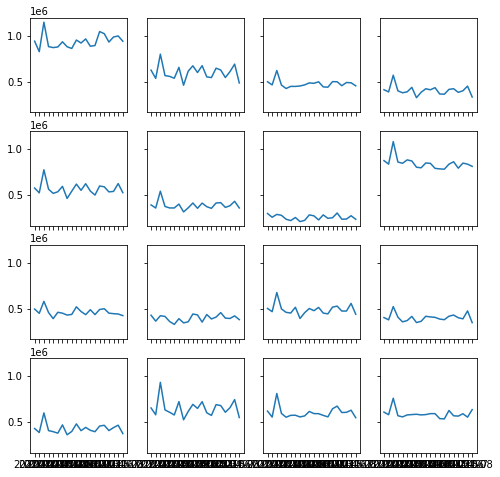

In [3]:
# clean sales data for march 2020 --> we cannot expect covid situation to repeat --> take average of february and april
brand3Sales = salesTrain[salesTrain['brand'] == 'brand_3_market']

fig, ax = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(8,8))
for i in range(4): 
    for j in range(4): 
        data = brand3Sales[brand3Sales['region'] == 'region_{}'.format(i*4 + j)]
        ax[i, j].plot(data['month'].values, data['sales'].values)
    
plt.show()

In [235]:
data

,month,region,brand,sales
79,2020-01,region_15,brand_3_market,607917.92
984,2020-02,region_15,brand_3_market,580128.96
1889,2020-03,region_15,brand_3_market,759033.37
2794,2020-04,region_15,brand_3_market,568824.42
3699,2020-05,region_15,brand_3_market,556272.39
4604,2020-06,region_15,brand_3_market,577520.23
5509,2020-07,region_15,brand_3_market,581359.30
6414,2020-08,region_15,brand_3_market,584739.33
7319,2020-09,region_15,brand_3_market,577765.55
8224,2020-10,region_15,brand_3_market,581259.26


In [4]:
for region in set(salesTrain.region.values.tolist()): 
    for brand in set(salesTrain.brand.values.tolist()):
        if int(region.split('_')[1]) > 150 and int(brand.split('_')[1]) in [1, 2]: 
            continue
        febIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-02'].index
        aprIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-04'].index
        marIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-03'].index
        salesTrain.at[marIndex.values[0], 'sales'] = (salesTrain.at[febIndex.values[0], 'sales'] + salesTrain.at[aprIndex.values[0], 'sales']) / 2

/tmp/ipykernel_22615/2805941336.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  febIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-02'].index
/tmp/ipykernel_22615/2805941336.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aprIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-04'].index
/tmp/ipykernel_22615/2805941336.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marIndex = salesTrain[salesTrain['brand'] == brand][salesTrain['region'] == region][salesTrain['month'] == '2020-03'].index


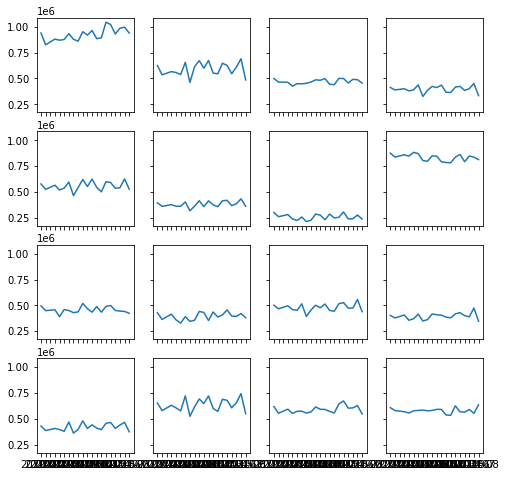

In [5]:
brand3Sales = salesTrain[salesTrain['brand'] == 'brand_3_market']

fig, ax = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(8,8))
for i in range(4): 
    for j in range(4): 
        data = brand3Sales[brand3Sales['region'] == 'region_{}'.format(i*4 + j)]
        ax[i, j].plot(data['month'].values, data['sales'].values)
    
plt.show()

In [6]:
salesTest = salesTrain[salesTrain['region'].apply(lambda x: int(x.split('_')[1]) > 150)]
salesTest.shape, salesTrain.shape

((3000, 4), (18100, 4))

In [7]:
salesTest.head()

,month,region,brand,sales
755,2020-01,region_151,brand_3,35347.30
756,2020-01,region_151,brand_12_market,213189.25
757,2020-01,region_151,brand_3_market,423435.51
758,2020-01,region_152,brand_3,34091.04
759,2020-01,region_152,brand_12_market,188121.51


In [8]:
salesTrain.drop(salesTest.index, inplace=True, axis=0)

In [16]:
rtes.head()

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
0,58555,General practicioner,region_0,brand_1,general,a3D6f0000019jMvEAI,1,0,2021-03-02 08:42:00,2021-03-02 08:45:00,NaN
1,819,General practicioner,region_1,brand_2,product_related,a3D6f0000019gA2EAI,0,0,2020-07-16 11:58:00,NaN,NaN
2,819,General practicioner,region_1,brand_2,general,a3D6f0000019jSnEAI,1,0,2020-08-17 14:47:00,2020-08-17 23:16:00,NaN
3,819,General practicioner,region_1,brand_1,product_related,a3D6f000000MtZ3EAK,0,0,2020-09-03 16:08:00,NaN,NaN
4,819,General practicioner,region_1,brand_1,general,a3D6f000000N0nhEAC,1,0,2020-10-16 13:35:00,2020-10-16 22:39:00,NaN


In [305]:
set(rtes.email_type.values.tolist())

{'general', 'product_related', 'regional events'}

In [17]:
regionHcps.head()

,region,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician
0,region_0,1372.440545,38799.972381,40214.895762,315,18,264,2,82
1,region_1,4701.726213,45377.708041,47137.854237,239,7,273,1,42
2,region_2,2574.943849,42578.018793,44456.389595,153,5,182,2,47
3,region_3,3639.373478,46856.492170,48564.228841,181,11,206,0,30
4,region_4,3926.381089,44462.421679,46388.545070,151,9,199,0,33


In [20]:
regionHcpsTransformed = pd.concat([regions.set_index('region', drop=True).drop(['area', 'pci16', 'pci18'], axis=1), 
                                   regionHcps.set_index('region', drop=True)], axis=1)
regionHcpsTransformed.shape

(201, 9)

In [21]:
regionHcpsTransformed.head()

,population,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician
region,,,,,,,,,
region_0,381958,1372.440545,38799.972381,40214.895762,315,18,264,2,82
region_1,431383,4701.726213,45377.708041,47137.854237,239,7,273,1,42
region_2,318026,2574.943849,42578.018793,44456.389595,153,5,182,2,47
region_3,343861,3639.373478,46856.492170,48564.228841,181,11,206,0,30
region_4,330916,3926.381089,44462.421679,46388.545070,151,9,199,0,33


In [22]:
# regionHcpAll = pd.concat([regionHcpsTransformed, hcps.set_index('region', drop=True)], axis=1)
regionHcpAll = regionHcpsTransformed.merge(hcps, how='inner',  right_on='region', left_index=True)
regionHcpAll.set_index('hcp', drop=False, inplace=True)
regionHcpAll.sort_index(inplace=True)
regionHcpAll.shape

(4939, 13)

In [23]:
regionHcpAll.head()

,population,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician,hcp,tier,region,specialty
hcp,,,,,,,,,,,,,
83,366237,456.777404,47846.729220,49044.242242,265,10,259,1,40,83,2,region_59,Internal medicine
112,385727,1076.159286,40191.980296,41539.866835,242,16,161,3,41,112,1,region_103,Internal medicine
307,419101,7692.893495,36767.221470,38579.415115,250,11,225,0,32,307,2,region_33,Internal medicine / pneumology
387,338417,3708.777236,38747.410778,41145.649040,259,18,161,1,55,387,2,region_97,Internal medicine / pneumology
426,311316,4469.158205,41460.329717,43261.443760,174,4,230,7,44,426,1,region_118,General practicioner


In [24]:
regionHcpAll.reset_index(drop=True, inplace=True)

In [25]:
regionHcpAll.rename(columns={c: c.replace(' ', '_') for c in regionHcpAll.columns}, inplace=True)

In [26]:
regionHcpAll.to_csv('./data/data_files/region_hcp_joined.csv')

### Analyse hcp

In [ ]:
query = """
SELECT 
    region, 
    tier,
    COUNT(hcp) AS hcp_count
    
FROM regionHcpAll
GROUP BY region, tier
"""
makeQuery(query)

In [28]:
query = """
SELECT specialty, COUNT(hcp) AS hcp_count
FROM hcps
GROUP BY specialty
"""
hcp_per_specialty = makeQuery(query)
hcp_per_specialty

,specialty,hcp_count
0,General practicioner,1861
1,Internal medicine,1227
2,Internal medicine / pneumology,1766
3,Internal medicine and general practicioner,49
4,Pediatrician,36


In [29]:
query = """
SELECT 
    regions.region, 
    population, 
    area, 
    pci16, 
    pci18, 
    hcp_count, 
    hcp_count/area AS hcp_density, 
    population/area AS population_density, 
    hcp_count / (population/area) AS hcp_per_population_density
FROM (
    SELECT region, COUNT(hcp) AS hcp_count
    FROM hcps
    GROUP BY region 
    ) AS hcp_per_region
INNER JOIN regions
ON regions.region = hcp_per_region.region
"""
hcp_count = makeQuery(query)
hcp_count

,region,population,area,pci16,pci18,hcp_count,hcp_density,population_density,hcp_per_population_density
0,region_0,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
1,region_1,431383,4701.726213,45377.708041,47137.854237,51,0.010847,91.749919,0.555859
2,region_2,318026,2574.943849,42578.018793,44456.389595,9,0.003495,123.507936,0.072870
3,region_3,343861,3639.373478,46856.492170,48564.228841,32,0.008793,94.483570,0.338683
4,region_4,330916,3926.381089,44462.421679,46388.545070,10,0.002547,84.280153,0.118652
...,...,...,...,...,...,...,...,...,...
196,region_196,488935,4383.308467,47628.428064,50590.455429,17,0.003878,111.544739,0.152405
197,region_197,367538,6688.080642,41370.782569,44005.413325,8,0.001196,54.954182,0.145576
198,region_198,374756,6500.068131,43452.297389,45337.580895,57,0.008769,57.654165,0.988654
199,region_199,319660,2309.103167,40976.821501,42691.767247,7,0.003031,138.434698,0.050565


<AxesSubplot:xlabel='area', ylabel='hcp_count'>

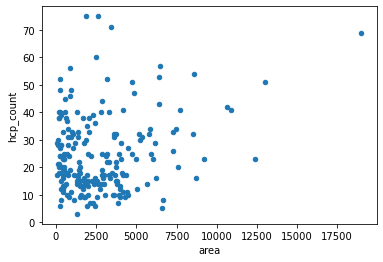

In [30]:
hcp_count.plot.scatter(x='area', y='hcp_count')

<AxesSubplot:xlabel='population_density', ylabel='hcp_count'>

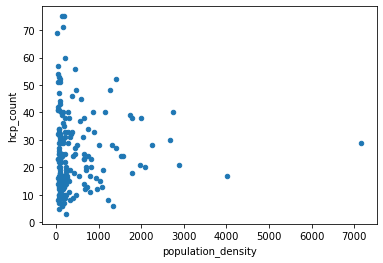

In [31]:
hcp_count.plot.scatter(x='population_density', y='hcp_count')

<AxesSubplot:xlabel='population', ylabel='hcp_count'>

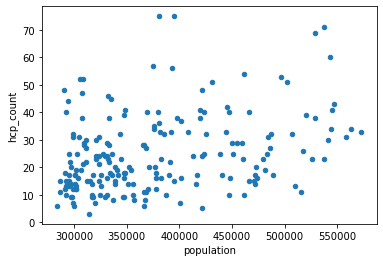

In [32]:
hcp_count.plot.scatter(x='population', y='hcp_count')

### Analyse total sales

In [261]:
query = """
SELECT region, brand, SUM(sales) AS total_sales
FROM salesTrain
GROUP BY region, brand
"""
total_sales_per_region = makeQuery(query)
total_sales_per_region

,region,brand,total_sales
0,region_0,brand_1,4.190960e+04
1,region_0,brand_12_market,1.048663e+07
2,region_0,brand_2,7.819610e+03
3,region_0,brand_3,1.103975e+06
4,region_0,brand_3_market,1.846244e+07
...,...,...,...
750,region_99,brand_1,7.997790e+03
751,region_99,brand_12_market,5.510492e+06
752,region_99,brand_2,1.318610e+03
753,region_99,brand_3,4.338528e+05


In [262]:
query = """
SELECT 
    hcp_count.region, 
    brand, 
    total_sales, 
    population, 
    area, 
    pci16, 
    pci18, 
    hcp_count, 
    hcp_density, 
    population_density, 
    hcp_per_population_density
FROM total_sales_per_region
INNER JOIN hcp_count
ON hcp_count.region = total_sales_per_region.region
"""
hcp_sales_joined = makeQuery(query)

In [263]:
hcp_sales_joined.shape

(755, 11)

In [264]:
hcp_sales_joined.head()

,region,brand,total_sales,population,area,pci16,pci18,hcp_count,hcp_density,population_density,hcp_per_population_density
0,region_0,brand_1,41909.60,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
1,region_0,brand_12_market,10486634.12,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
2,region_0,brand_2,7819.61,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
3,region_0,brand_3,1103975.26,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
4,region_0,brand_3_market,18462441.28,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575


In [265]:
brands = set(hcp_sales_joined.brand.values.tolist())
brands

{'brand_1', 'brand_12_market', 'brand_2', 'brand_3', 'brand_3_market'}

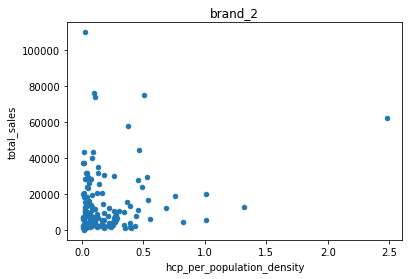

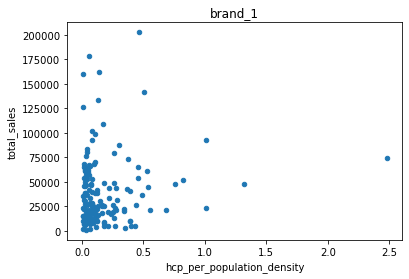

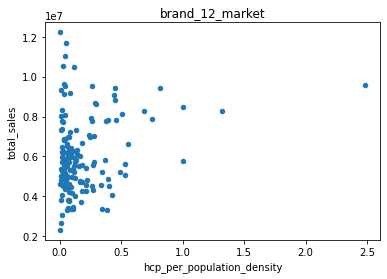

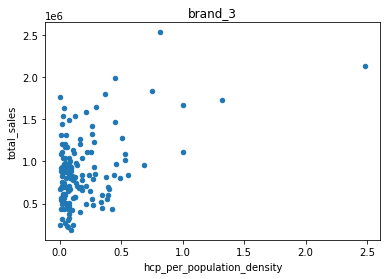

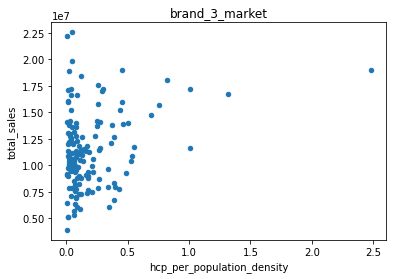

In [266]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_per_population_density', y='total_sales')
    plt.title(value)

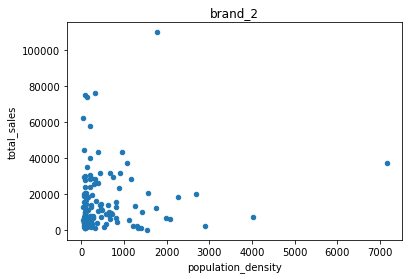

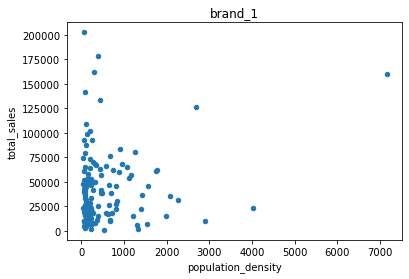

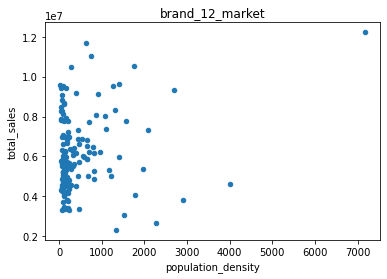

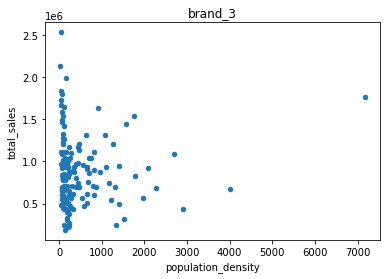

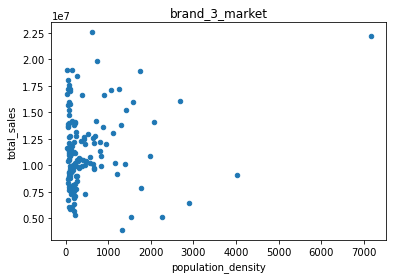

In [267]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='population_density', y='total_sales')
    plt.title(value)

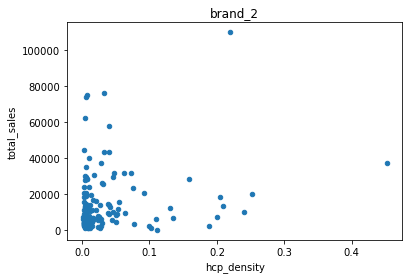

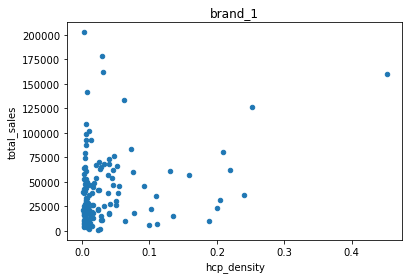

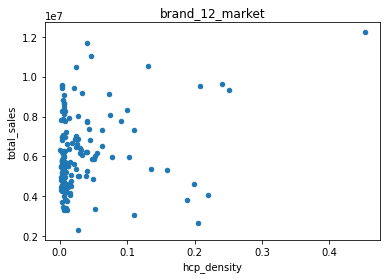

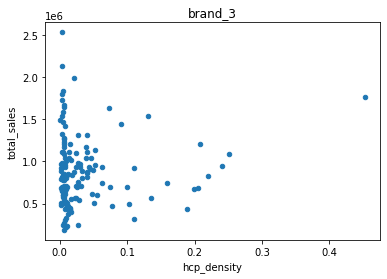

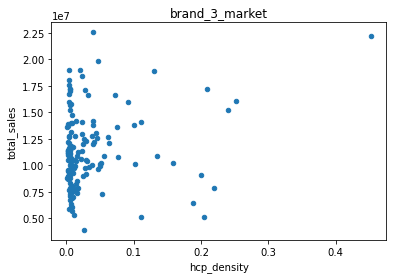

In [268]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_density', y='total_sales')
    plt.title(value)

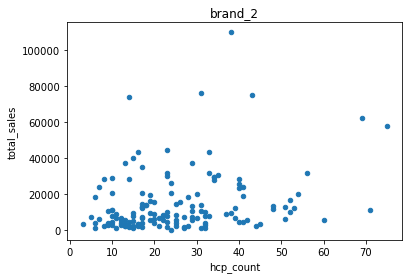

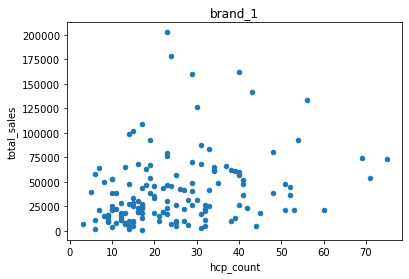

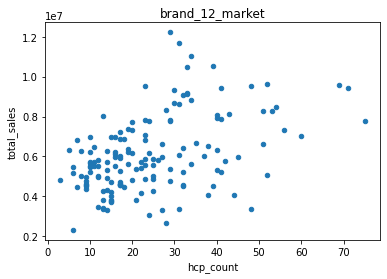

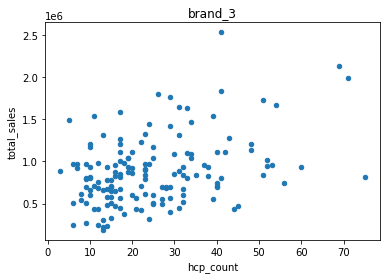

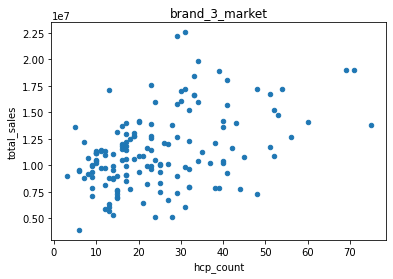

In [269]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_count', y='total_sales')
    plt.title(value)

In [270]:
transformedData = {}
for brand in brands: 
    query = """
    SELECT 
        region,
        total_sales / area AS sales_per_area, 
        total_sales / population AS sales_per_population, 
        total_sales / population_density AS sales_per_population_density, 
        total_sales / hcp_count AS sales_per_hcp, 
        total_sales / hcp_density AS sales_per_hcp_density, 
        total_sales / hcp_per_population_density AS sales_per_hcp_pop_density, 
        hcp_count, 
        hcp_density, 
        hcp_per_population_density, 
        area, 
        population
    FROM hcp_sales_joined
    WHERE brand = '{brand}'
    """.format(brand=brand)
    salesTransformed = makeQuery(query)
    transformedData[brand] = salesTransformed

In [271]:
transformedData['brand_3'].head()

,region,sales_per_area,sales_per_population,sales_per_population_density,sales_per_hcp,sales_per_hcp_density,sales_per_hcp_pop_density,hcp_count,hcp_density,hcp_per_population_density,area,population
0,region_0,804.388404,2.890305,3966.772283,33453.795758,4.591335e+07,9.310381e+06,33,0.024045,0.118575,1372.440545,381958
1,region_1,179.352755,1.954800,9190.935073,16534.657843,7.774143e+07,1.517054e+06,51,0.010847,0.555859,4701.726213,431383
2,region_10,238.831599,1.428782,4034.353799,48169.452143,1.360128e+08,8.051883e+06,14,0.004958,0.083753,2823.631100,471991
3,region_100,498.981867,3.413653,6629.599850,161510.745833,3.136674e+08,2.360841e+07,6,0.003089,0.041047,1942.083550,283879
4,region_101,177.081812,0.926234,1579.160085,23223.955769,3.959513e+07,4.440068e+06,13,0.007625,0.067997,1704.926220,325956


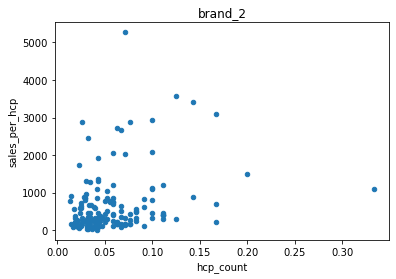

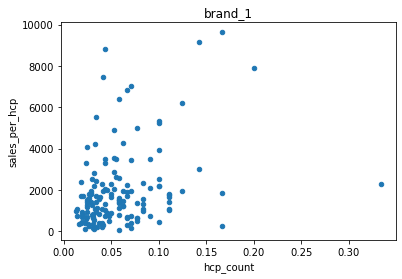

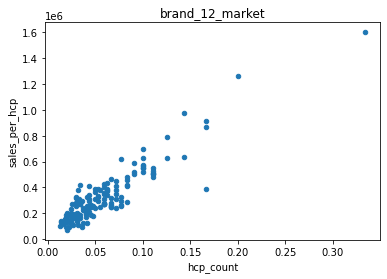

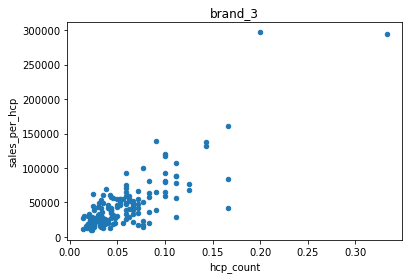

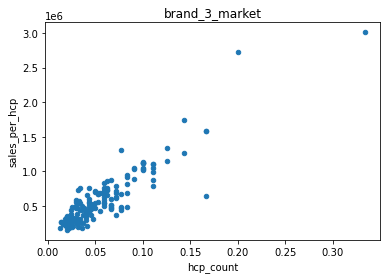

In [272]:
for brand in brands: 
    temp = pd.DataFrame(1/transformedData[brand]['hcp_count'], columns=['hcp_count'])
    temp['sales_per_hcp'] = transformedData[brand]['sales_per_hcp']
    temp.plot.scatter(x='hcp_count', y='sales_per_hcp')
    plt.title(brand)

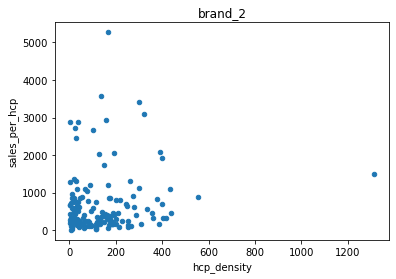

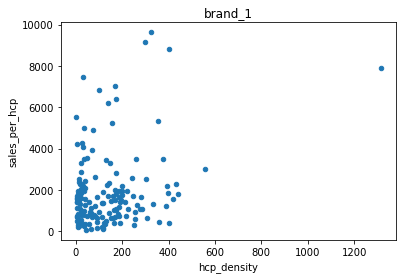

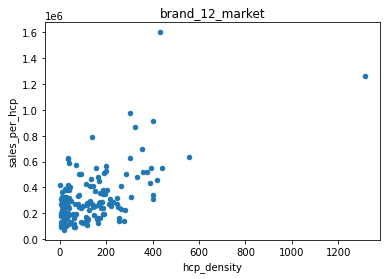

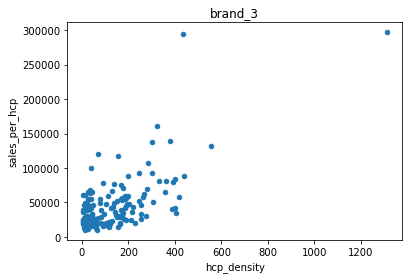

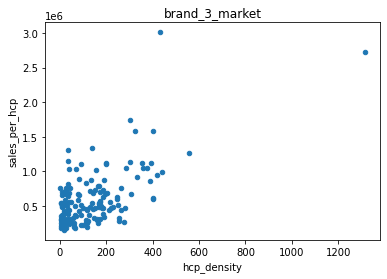

In [273]:
for brand in brands: 
    temp = pd.DataFrame(1/transformedData[brand]['hcp_density'], columns=['hcp_density'])
    temp['sales_per_hcp'] = transformedData[brand]['sales_per_hcp']
    temp.plot.scatter(x='hcp_density', y='sales_per_hcp')
    # transformedData[brand].plot.scatter(x='hcp_density', y='sales_per_hcp')
    plt.title(brand)

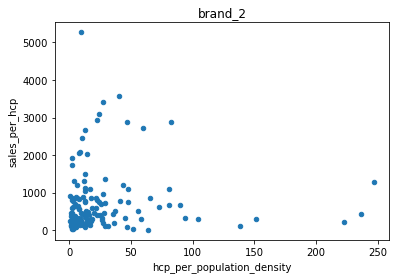

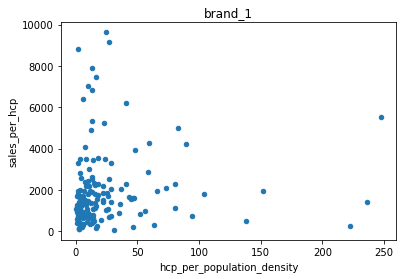

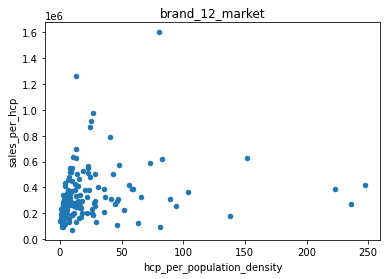

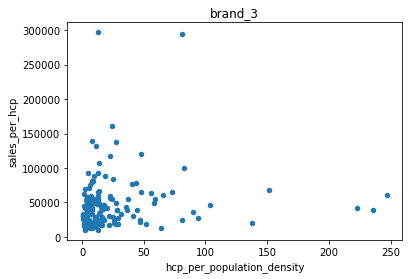

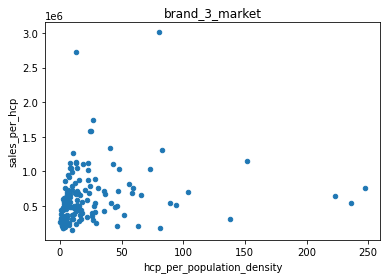

In [274]:
for brand in brands: 
    temp = pd.DataFrame(1/transformedData[brand]['hcp_per_population_density'], columns=['hcp_per_population_density'])
    temp['sales_per_hcp'] = transformedData[brand]['sales_per_hcp']
    temp.plot.scatter(x='hcp_per_population_density', y='sales_per_hcp')
    #transformedData[brand].plot.scatter(x='hcp_per_population_density', y='sales_per_hcp')
    plt.title(brand)

### Analyse rte

In [68]:
rtes.head(n=25)

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
0,58555,General practicioner,region_0,brand_1,general,a3D6f0000019jMvEAI,1,0,2021-03-02 08:42:00,2021-03-02 08:45:00,NaN
1,819,General practicioner,region_1,brand_2,product_related,a3D6f0000019gA2EAI,0,0,2020-07-16 11:58:00,NaN,NaN
2,819,General practicioner,region_1,brand_2,general,a3D6f0000019jSnEAI,1,0,2020-08-17 14:47:00,2020-08-17 23:16:00,NaN
3,819,General practicioner,region_1,brand_1,product_related,a3D6f000000MtZ3EAK,0,0,2020-09-03 16:08:00,NaN,NaN
4,819,General practicioner,region_1,brand_1,general,a3D6f000000N0nhEAC,1,0,2020-10-16 13:35:00,2020-10-16 22:39:00,NaN
5,819,General practicioner,region_1,brand_1,general,a3D6f0000019jMvEAI,0,0,2020-12-14 12:06:00,NaN,NaN
6,4005,General practicioner,region_1,brand_2,product_related,a3D6f0000019gA2EAI,0,0,2020-07-16 15:15:00,NaN,NaN
7,4005,General practicioner,region_1,brand_2,general,a3D6f0000019jSnEAI,1,0,2020-08-17 14:59:00,2020-08-17 15:58:00,NaN
8,4005,General practicioner,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",0,0,2020-09-03 06:22:00,NaN,NaN
9,4005,General practicioner,region_1,brand_1,general,a3D6f0000019jMvEAI,0,0,2020-11-09 22:24:00,NaN,NaN


In [32]:
len(set(rtes.region.values.tolist())), len(set(rtes.brand.values.tolist()))

(201, 2)

In [33]:
# split content id into separate columns
multiContentColumns = rtes[rtes['content_id'].apply(lambda x: not pd.isna(x) and ',' in x)]
multiContentColumns.shape

(6728, 11)

In [34]:
multiContentColumns.head()

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
8,4005,General practicioner,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",0,0,2020-09-03 06:22:00,NaN,NaN
12,9113,General practicioner,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",0,0,2020-09-06 16:10:00,NaN,NaN
15,10003,General practicioner,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",0,0,2020-09-04 03:27:00,NaN,NaN
18,11885,General practicioner,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",1,0,2020-09-04 03:27:00,2020-09-04 07:34:00,NaN
21,13228,Internal medicine,region_1,brand_1,product_related,"a3D6f0000019jDTEAY,a3D6f000000MtbmEAC",0,0,2020-09-04 03:27:00,NaN,NaN


In [35]:
missingContentColumns = rtes[rtes['content_id'].apply(pd.isna)]
missingContentColumns.shape

(1348, 11)

In [36]:
missingContentColumns.head()

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
10,4887,General practicioner,region_1,brand_1,product_related,NaN,2,0,2020-09-07 11:21:00,2020-09-18 20:47:00,NaN
53,19510,General practicioner,region_1,brand_1,product_related,NaN,0,0,2020-09-04 16:12:00,NaN,NaN
87,25273,General practicioner,region_1,brand_1,product_related,NaN,5,0,2021-06-10 10:40:00,2021-06-12 14:02:00,NaN
105,28364,General practicioner,region_1,brand_1,product_related,NaN,7,0,2020-09-04 15:37:00,2020-09-08 11:26:00,NaN
125,34693,General practicioner,region_1,brand_1,product_related,NaN,1,0,2020-10-14 10:23:00,2020-10-14 10:28:00,NaN


In [37]:
splittedContentColumns = []
for i, row in multiContentColumns.iterrows(): 
    contents = row['content_id'].split(',')
    for content in contents: 
        row['content_id'] = content
        splittedContentColumns.append([v for v in row.values])
        
splittedContentColumns = pd.DataFrame(splittedContentColumns, columns=multiContentColumns.columns)
splittedContentColumns.head()

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
0,4005,General practicioner,region_1,brand_1,product_related,a3D6f0000019jDTEAY,0,0,2020-09-03 06:22:00,NaN,NaN
1,4005,General practicioner,region_1,brand_1,product_related,a3D6f000000MtbmEAC,0,0,2020-09-03 06:22:00,NaN,NaN
2,9113,General practicioner,region_1,brand_1,product_related,a3D6f0000019jDTEAY,0,0,2020-09-06 16:10:00,NaN,NaN
3,9113,General practicioner,region_1,brand_1,product_related,a3D6f000000MtbmEAC,0,0,2020-09-06 16:10:00,NaN,NaN
4,10003,General practicioner,region_1,brand_1,product_related,a3D6f0000019jDTEAY,0,0,2020-09-04 03:27:00,NaN,NaN


In [38]:
print(rtes.shape)
rtes.drop(multiContentColumns.index, axis=0, inplace=True)
print(rtes.shape)
rtes = pd.concat([rtes, splittedContentColumns], axis=0)
rtes.reset_index(drop=True, inplace=True)
print(rtes.shape)

(41668, 11)
(34940, 11)
(50435, 11)


In [39]:
rtes.dropna(axis=0, inplace=True, subset=['content_id'])
print(rtes.shape)

(49087, 11)


In [89]:
brands = set(rtes['brand'].values.tolist())
brands

{'brand_1', 'brand_2'}

In [91]:
rte_per_brand = {brand: rtes[rtes['brand'] == brand] for brand in brands}
for brand, rte in rte_per_brand.items(): 
    print(brand, rte.shape)

brand_2 (9953, 11)
brand_1 (39134, 11)


### Analyse timing of rte on response rate

In [98]:
for timeColumn in ['time_sent', 'time_last_opened', 'time_last_clicked']: 
    rtes[timeColumn] = pd.to_datetime(rtes[timeColumn])

In [102]:
rtes['hour_sent'] = rtes['time_sent'].apply(lambda x: x.hour)

In [103]:
rtes['day_sent'] = rtes['time_sent'].apply(lambda x: x.day)

In [157]:
groupedByHour = rtes.groupby('hour_sent').agg({
    'hcp': 'count', 
    'no. openings': 'sum',
    'no. clicks': 'sum', 
})
groupedByHour

,hcp,no. openings,no. clicks
hour_sent,,,
0,8,10,0
3,213,162,0
5,46,27,0
6,382,634,21
7,1169,1137,73
8,2776,4190,289
9,4482,7465,559
10,6239,6335,802
11,6903,11014,742


In [158]:
groupedByHour.reset_index(drop=False, inplace=True)
groupedByHour.rename(columns={'hcp': 'mails_sent'}, inplace=True)
groupedByHour

,hour_sent,mails_sent,no. openings,no. clicks
0,0,8,10,0
1,3,213,162,0
2,5,46,27,0
3,6,382,634,21
4,7,1169,1137,73
5,8,2776,4190,289
6,9,4482,7465,559
7,10,6239,6335,802
8,11,6903,11014,742
9,12,5652,6307,605


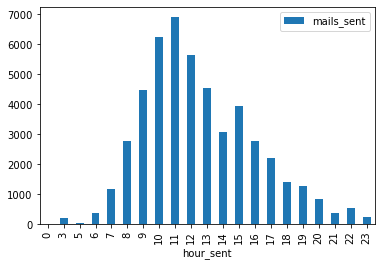

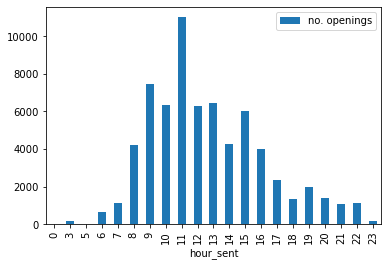

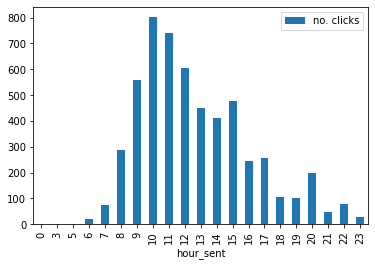

In [159]:
for c in groupedByHour.columns: 
    if c == 'hour_sent': 
        continue
    groupedByHour.plot.bar(x='hour_sent', y=c)

In [160]:
groupedByHour[['mails_sent', 'no. openings', 'no. clicks']].corr()

,mails_sent,no. openings,no. clicks
mails_sent,1.00000,0.963800,0.980990
no. openings,0.96380,1.000000,0.940541
no. clicks,0.98099,0.940541,1.000000


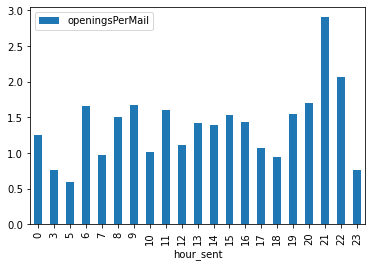

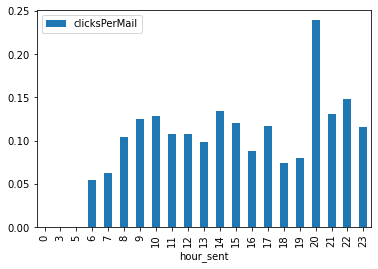

In [161]:
groupedByHour['openingsPerMail'] = groupedByHour['no. openings'] / groupedByHour['mails_sent']
groupedByHour['clicksPerMail'] = groupedByHour['no. clicks'] / groupedByHour['mails_sent']
for c in ['openingsPerMail', 'clicksPerMail']: 
    groupedByHour.plot.bar(x='hour_sent', y=c)

In [130]:
groupedByDay = rtes.groupby('day_sent').agg({
    'hcp': 'count', 
    'no. openings': 'sum',
    'no. clicks': 'sum', 
})
groupedByDay

,hcp,no. openings,no. clicks
day_sent,,,
1,2250,2547,216
2,1855,1943,141
3,2415,2461,164
4,1529,1702,93
5,2003,2354,135
6,1157,1670,138
7,2850,3432,176
8,2138,4253,261
9,1550,2351,122


In [131]:
groupedByDay.reset_index(drop=False, inplace=True)
groupedByDay.rename(columns={'hcp': 'mails_sent'}, inplace=True)

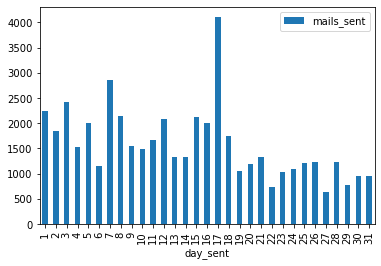

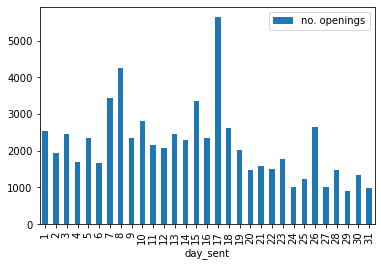

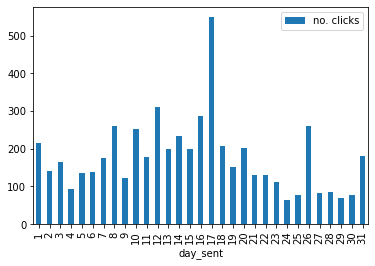

In [133]:
for c in groupedByDay.columns: 
    if c == 'day_sent': 
        continue
    groupedByDay.plot.bar(x='day_sent', y=c)

In [134]:
groupedByDay[['mails_sent', 'no. openings', 'no. clicks']].corr()

,mails_sent,no. openings,no. clicks
mails_sent,1.000000,0.860146,0.735540
no. openings,0.860146,1.000000,0.805694
no. clicks,0.735540,0.805694,1.000000


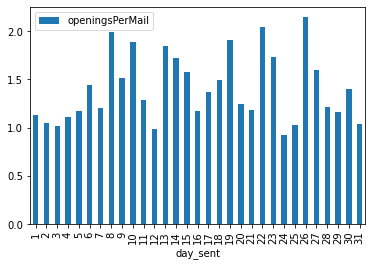

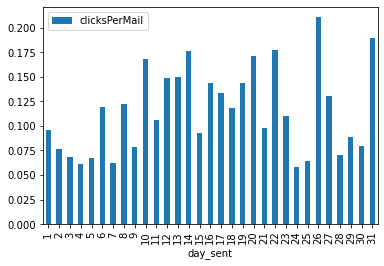

In [135]:
groupedByDay['openingsPerMail'] = groupedByDay['no. openings'] / groupedByDay['mails_sent']
groupedByDay['clicksPerMail'] = groupedByDay['no. clicks'] / groupedByDay['mails_sent']
for c in ['openingsPerMail', 'clicksPerMail']: 
    groupedByDay.plot.bar(x='day_sent', y=c)

In [138]:
rtes['weekday_sent'] = rtes['time_sent'].apply(lambda x: x.weekday())

In [140]:
groupedByWeekDay = rtes.groupby('weekday_sent').agg({
    'hcp': 'count', 
    'no. openings': 'sum',
    'no. clicks': 'sum', 
})
groupedByWeekDay

,hcp,no. openings,no. clicks
weekday_sent,,,
0,13456,16544,1423
1,9319,14029,927
2,9247,11419,1120
3,9122,11822,1132
4,7428,12813,815
5,128,136,19
6,387,679,49


In [141]:
groupedByWeekDay.reset_index(drop=False, inplace=True)
groupedByWeekDay.rename(columns={'hcp': 'mails_sent'}, inplace=True)

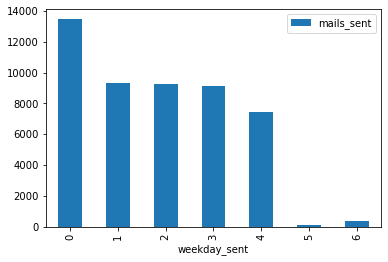

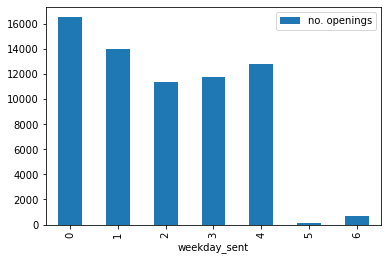

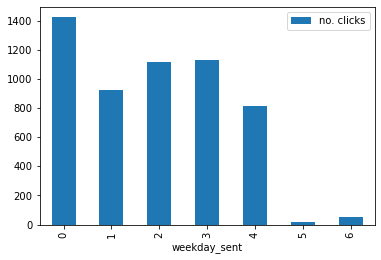

In [142]:
for c in groupedByWeekDay.columns: 
    if c == 'weekday_sent': 
        continue
    groupedByWeekDay.plot.bar(x='weekday_sent', y=c)

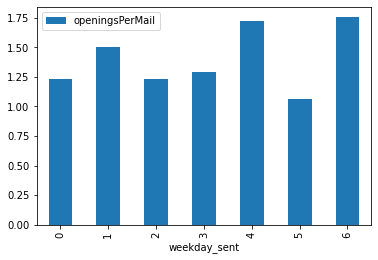

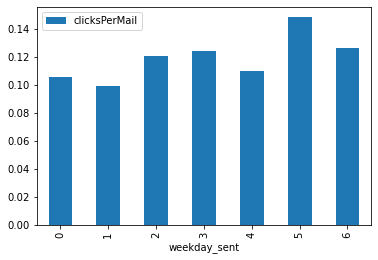

In [143]:
groupedByWeekDay['openingsPerMail'] = groupedByWeekDay['no. openings'] / groupedByWeekDay['mails_sent']
groupedByWeekDay['clicksPerMail'] = groupedByWeekDay['no. clicks'] / groupedByWeekDay['mails_sent']
for c in ['openingsPerMail', 'clicksPerMail']: 
    groupedByWeekDay.plot.bar(x='weekday_sent', y=c)

In [144]:
meanOpeningsPerMail = groupedByWeekDay['openingsPerMail'].mean()
meanClicksPerMail = groupedByWeekDay['clicksPerMail'].mean()
stdOpeningsPerMail = groupedByWeekDay['openingsPerMail'].std()
stdClicksPerMail = groupedByWeekDay['clicksPerMail'].std()


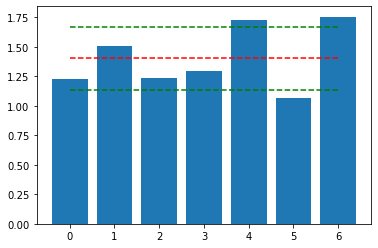

In [150]:
fig, ax = plt.subplots()
ax.bar(groupedByWeekDay['weekday_sent'].values, groupedByWeekDay['openingsPerMail'].values)

ax.plot([0, 6], [meanOpeningsPerMail, meanOpeningsPerMail], "r--")
ax.plot([0, 6], [meanOpeningsPerMail+stdOpeningsPerMail, meanOpeningsPerMail+stdOpeningsPerMail], 'g--')
ax.plot([0, 6], [meanOpeningsPerMail-stdOpeningsPerMail, meanOpeningsPerMail-stdOpeningsPerMail], 'g--')
plt.show()

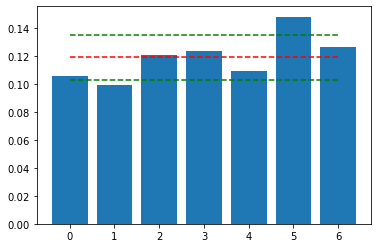

In [151]:
fig, ax = plt.subplots()
ax.bar(groupedByWeekDay['weekday_sent'].values, groupedByWeekDay['clicksPerMail'].values)

ax.plot([0, 6], [meanClicksPerMail, meanClicksPerMail], "r--")
ax.plot([0, 6], [meanClicksPerMail+stdClicksPerMail, meanClicksPerMail+stdClicksPerMail], 'g--')
ax.plot([0, 6], [meanClicksPerMail-stdClicksPerMail, meanClicksPerMail-stdClicksPerMail], 'g--')
plt.show()

In [162]:
meanOpeningsPerMail = groupedByHour['openingsPerMail'].mean()
meanClicksPerMail = groupedByHour['clicksPerMail'].mean()
stdOpeningsPerMail = groupedByHour['openingsPerMail'].std()
stdClicksPerMail = groupedByHour['clicksPerMail'].std()


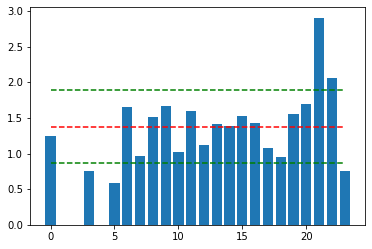

In [163]:
fig, ax = plt.subplots()
ax.bar(groupedByHour['hour_sent'].values, groupedByHour['openingsPerMail'].values)

ax.plot([0, 23], [meanOpeningsPerMail, meanOpeningsPerMail], "r--")
ax.plot([0, 23], [meanOpeningsPerMail+stdOpeningsPerMail, meanOpeningsPerMail+stdOpeningsPerMail], 'g--')
ax.plot([0, 23], [meanOpeningsPerMail-stdOpeningsPerMail, meanOpeningsPerMail-stdOpeningsPerMail], 'g--')
plt.show()

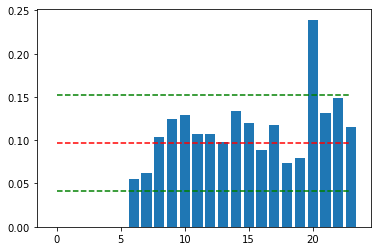

In [164]:
fig, ax = plt.subplots()
ax.bar(groupedByHour['hour_sent'].values, groupedByHour['clicksPerMail'].values)

ax.plot([0, 23], [meanClicksPerMail, meanClicksPerMail], "r--")
ax.plot([0, 23], [meanClicksPerMail+stdClicksPerMail, meanClicksPerMail+stdClicksPerMail], 'g--')
ax.plot([0, 23], [meanClicksPerMail-stdClicksPerMail, meanClicksPerMail-stdClicksPerMail], 'g--')
plt.show()

### Response rate per specialty

In [167]:
groupedBySpecialty = rtes.groupby('specialty').agg({
    'hcp': 'count', 
    'no. openings': 'sum',
    'no. clicks': 'sum', 
})
groupedBySpecialty.reset_index(drop=False, inplace=True)
groupedBySpecialty.rename(columns={'hcp': 'mails_sent'}, inplace=True)
groupedBySpecialty['openingsPerMail'] = groupedBySpecialty['no. openings'] / groupedBySpecialty['mails_sent']
groupedBySpecialty['clicksPerMail'] = groupedBySpecialty['no. clicks'] / groupedBySpecialty['mails_sent']
groupedBySpecialty

,specialty,mails_sent,no. openings,no. clicks,openingsPerMail,clicksPerMail
0,General practicioner,25808,25770,1332,0.998528,0.051612
1,Internal medicine,13952,16030,1473,1.148939,0.105576
2,Internal medicine / pneumology,8668,24846,2621,2.866405,0.302377
3,Internal medicine and general practicioner,465,437,17,0.939785,0.036559
4,Pediatrician,194,359,42,1.850515,0.216495


In [303]:
set(rtes[rtes['specialty'] == 'Pediatrician'].region.values.tolist())

{'region_105',
 'region_108',
 'region_109',
 'region_112',
 'region_121',
 'region_122',
 'region_154',
 'region_156',
 'region_160',
 'region_162',
 'region_163',
 'region_170',
 'region_172',
 'region_173',
 'region_175',
 'region_176',
 'region_179',
 'region_184',
 'region_186',
 'region_187',
 'region_19',
 'region_191',
 'region_196',
 'region_2',
 'region_20',
 'region_22',
 'region_24',
 'region_30',
 'region_32',
 'region_39',
 'region_43',
 'region_45',
 'region_46',
 'region_47',
 'region_50',
 'region_51',
 'region_55',
 'region_58',
 'region_66',
 'region_67',
 'region_69',
 'region_7',
 'region_70',
 'region_73',
 'region_79',
 'region_81',
 'region_83',
 'region_88',
 'region_92',
 'region_94',
 'region_95'}

In [173]:
specialtyCount = hcps.groupby('specialty').agg({'hcp': 'count'})
specialtyCount.rename(columns={'hcp': 'hcp_count'}, inplace=True)
specialtyCount

,hcp_count
specialty,
General practicioner,1861
Internal medicine,1227
Internal medicine / pneumology,1766
Internal medicine and general practicioner,49
Pediatrician,36


In [193]:
merged = pd.concat([specialtyCount, groupedBySpecialty.set_index('specialty', drop=False)], axis=1)
merged.reset_index(drop=True, inplace=True)
merged['mailsPerHcp'] = merged['mails_sent']/merged['hcp_count']
merged

,hcp_count,specialty,mails_sent,no. openings,no. clicks,openingsPerMail,clicksPerMail,mailsPerHcp
0,1861,General practicioner,25808,25770,1332,0.998528,0.051612,13.867813
1,1227,Internal medicine,13952,16030,1473,1.148939,0.105576,11.370823
2,1766,Internal medicine / pneumology,8668,24846,2621,2.866405,0.302377,4.908267
3,49,Internal medicine and general practicioner,465,437,17,0.939785,0.036559,9.489796
4,36,Pediatrician,194,359,42,1.850515,0.216495,5.388889


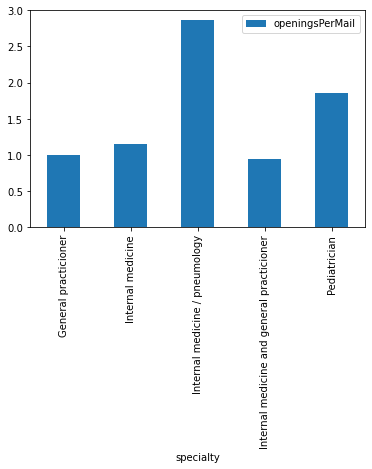

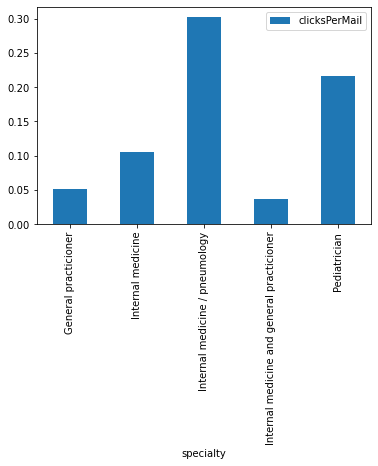

In [179]:
for c in ['openingsPerMail', 'clicksPerMail']: 
    merged.plot.bar(x='specialty', y=c)

<AxesSubplot:xlabel='mailsPerHcp', ylabel='openingsPerMail'>

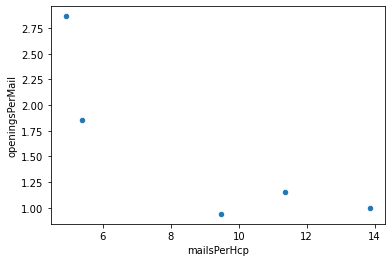

In [182]:
merged.plot.scatter(x='mailsPerHcp', y='openingsPerMail')

<AxesSubplot:xlabel='mailsPerHcp', ylabel='clicksPerMail'>

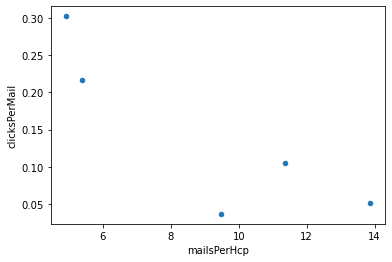

In [183]:
merged.plot.scatter(x='mailsPerHcp', y='clicksPerMail')

In [191]:
query = """
SELECT 
    specialty, 
    COUNT(*) AS content_count, 
    COUNT(DISTINCT content_id) AS uniqueContentCount
FROM rtes
GROUP BY specialty
"""
contentDiversity = makeQuery(query)
contentDiversity

,specialty,content_count,uniqueContentCount
0,General practicioner,25808,145
1,Internal medicine,13952,150
2,Internal medicine / pneumology,8668,150
3,Internal medicine and general practicioner,465,82
4,Pediatrician,194,56


In [194]:
merged = pd.concat([merged.set_index('specialty', drop=False), 
                    contentDiversity.set_index('specialty', drop=True)], 
                  axis=1)
merged.reset_index(drop=True, inplace=True)
merged

,hcp_count,specialty,mails_sent,no. openings,no. clicks,openingsPerMail,clicksPerMail,mailsPerHcp,content_count,uniqueContentCount
0,1861,General practicioner,25808,25770,1332,0.998528,0.051612,13.867813,25808,145
1,1227,Internal medicine,13952,16030,1473,1.148939,0.105576,11.370823,13952,150
2,1766,Internal medicine / pneumology,8668,24846,2621,2.866405,0.302377,4.908267,8668,150
3,49,Internal medicine and general practicioner,465,437,17,0.939785,0.036559,9.489796,465,82
4,36,Pediatrician,194,359,42,1.850515,0.216495,5.388889,194,56


### Does the response rate per region / per specialty correlate with sales?

In [40]:
rtes.rename(columns={'no. openings': 'nr_openings', 'no. clicks': 'nr_clicks'}, inplace=True)

In [42]:
query = """
SELECT
    grouped_by_region.region, 
    mails_sent, 
    nr_openings, 
    nr_clicks, 
    content_count, 
    unique_content_count, 
    hcp_count,
    nr_openings / mails_sent AS openings_per_mail, 
    nr_clicks / mails_sent AS clicks_per_mail, 
    mails_sent / hcp_count AS mails_per_hcp
FROM (
    SELECT 
        region,
        specialty,
        CAST(COUNT(*)AS real) AS mails_sent , 
        CAST(SUM(nr_openings) AS real) AS nr_openings, 
        CAST(SUM(nr_clicks) AS real) AS nr_clicks, 
        COUNT(content_id) AS content_count, 
        COUNT(DISTINCT content_id) AS unique_content_count
    FROM rtes
    GROUP BY region
    ) AS grouped_by_region
INNER JOIN (
    SELECT 
        region,
        COUNT(*) AS hcp_count
    FROM hcps
    GROUP BY region
    ) AS hcp_per_region_count
ON hcp_per_region_count.region = grouped_by_region.region
"""
grouped_by_region = makeQuery(query)
grouped_by_region.tail()

,region,mails_sent,nr_openings,nr_clicks,content_count,unique_content_count,hcp_count,openings_per_mail,clicks_per_mail,mails_per_hcp
196,region_95,676.0,1359.0,77.0,676,44,40,2.010355,0.113905,16.900000
197,region_96,240.0,186.0,9.0,240,22,23,0.775000,0.037500,10.434783
198,region_97,199.0,151.0,12.0,199,15,20,0.758794,0.060302,9.950000
199,region_98,213.0,112.0,5.0,213,9,32,0.525822,0.023474,6.656250
200,region_99,161.0,121.0,3.0,161,6,11,0.751553,0.018634,14.636364


In [44]:
grouped_by_region[grouped_by_region['region'] == 'region_169']

,region,mails_sent,nr_openings,nr_clicks,content_count,unique_content_count,hcp_count,openings_per_mail,clicks_per_mail,mails_per_hcp
78,region_169,221.0,179.0,30.0,221,15,19,0.809955,0.135747,11.631579


In [295]:
grouped_by_region.shape

(201, 10)

In [211]:
pearsonr(grouped_by_region.mails_sent.values, grouped_by_region.openings_per_mail.values)

(-0.11055671160929095, 0.11818678439848482)

In [212]:
pearsonr(grouped_by_region.mails_sent.values, grouped_by_region.clicks_per_mail.values)

(-0.011470978724115365, 0.8716049280260639)

In [213]:
pearsonr(grouped_by_region.unique_content_count.values, grouped_by_region.openings_per_mail.values)

(0.07590486584974585, 0.28418227761814124)

In [214]:
pearsonr(grouped_by_region.unique_content_count.values, grouped_by_region.clicks_per_mail.values)

(0.15145807207400988, 0.03184953648179142)

<AxesSubplot:xlabel='unique_content_count', ylabel='clicks_per_mail'>

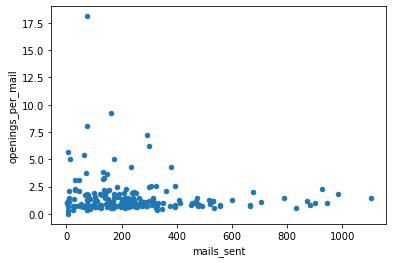

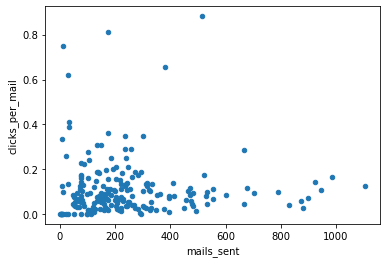

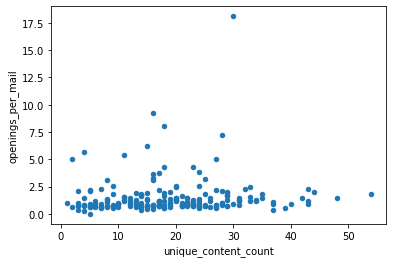

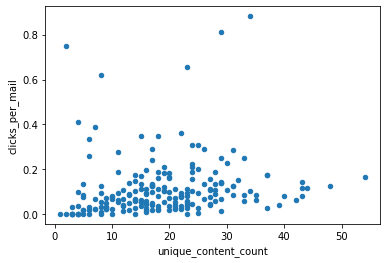

In [215]:
grouped_by_region.plot.scatter(x='mails_sent', y='openings_per_mail')
grouped_by_region.plot.scatter(x='mails_sent', y='clicks_per_mail')
grouped_by_region.plot.scatter(x='unique_content_count', y='openings_per_mail')
grouped_by_region.plot.scatter(x='unique_content_count', y='clicks_per_mail')

<AxesSubplot:xlabel='content_count', ylabel='clicks_per_mail'>

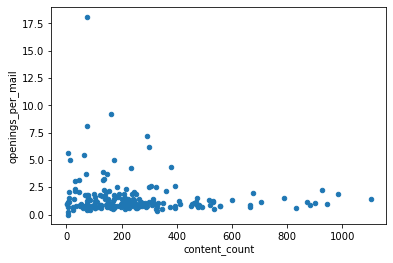

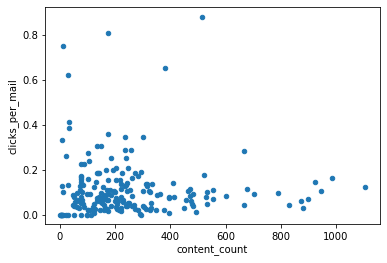

In [216]:
grouped_by_region.plot.scatter(x='content_count', y='openings_per_mail')
grouped_by_region.plot.scatter(x='content_count', y='clicks_per_mail')

In [217]:
pearsonr(grouped_by_region.content_count.values, grouped_by_region.clicks_per_mail.values)

(-0.011470978724115365, 0.8716049280260639)

In [218]:
pearsonr(grouped_by_region.content_count.values, grouped_by_region.openings_per_mail.values)

(-0.11055671160929095, 0.11818678439848482)

In [282]:
query = """
SELECT *
FROM (
    SELECT 
        region, 
        SUM(sales) AS total_sales
    FROM salesTrain
    WHERE brand = 'brand_1' OR brand = 'brand_2'
    GROUP BY region ) AS sales_per_region
INNER JOIN grouped_by_region
ON sales_per_region.region = grouped_by_region.region
"""
totalSales = makeQuery(query)

In [283]:
totalSales.head()

,region,total_sales,region,mails_sent,nr_openings,nr_clicks,content_count,unique_content_count,hcp_count,openings_per_mail,clicks_per_mail,mails_per_hcp
0,region_0,49729.21,region_0,1.0,1.0,0.0,1,1,33,1.000000,0.000000,0.030303
1,region_1,28079.53,region_1,455.0,441.0,29.0,455,14,51,0.969231,0.063736,8.921569
2,region_10,29422.29,region_10,533.0,293.0,24.0,533,27,14,0.549719,0.045028,38.071429
3,region_100,76333.85,region_100,46.0,144.0,2.0,46,16,6,3.130435,0.043478,7.666667
4,region_101,10008.40,region_101,49.0,41.0,0.0,49,3,13,0.836735,0.000000,3.769231


<AxesSubplot:xlabel='mails_per_hcp', ylabel='total_sales'>

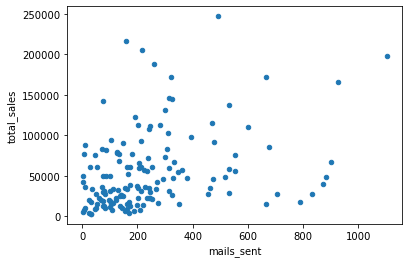

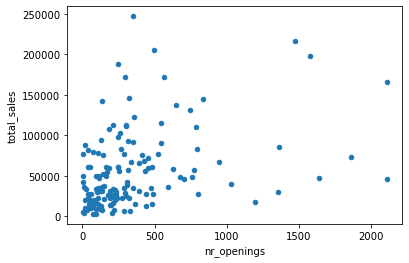

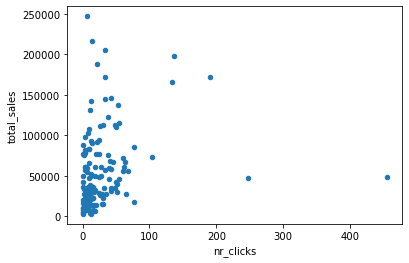

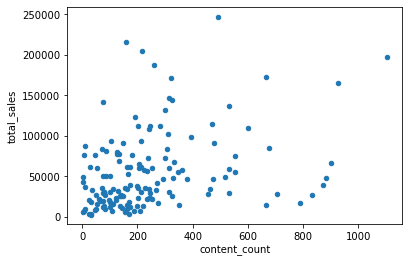

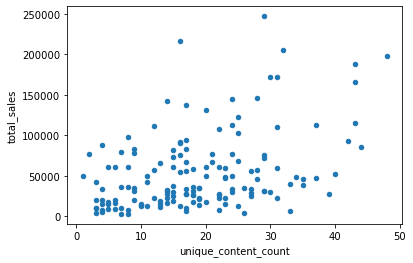

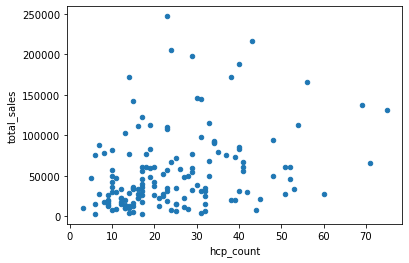

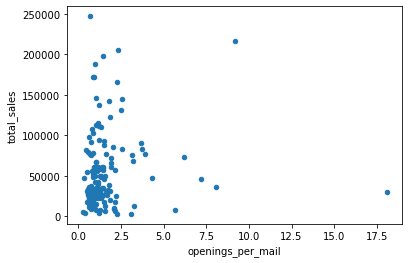

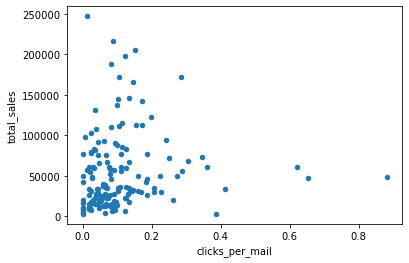

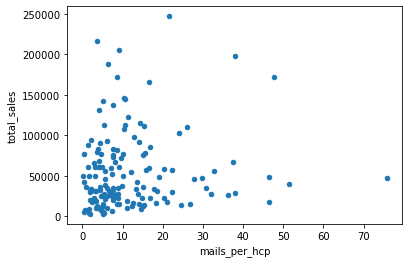

In [285]:
totalSales.plot.scatter(x='mails_sent', y='total_sales')
totalSales.plot.scatter(x='nr_openings', y='total_sales')
totalSales.plot.scatter(x='nr_clicks', y='total_sales')
totalSales.plot.scatter(x='content_count', y='total_sales')
totalSales.plot.scatter(x='unique_content_count', y='total_sales')
totalSales.plot.scatter(x='hcp_count', y='total_sales')
totalSales.plot.scatter(x='openings_per_mail', y='total_sales')
totalSales.plot.scatter(x='clicks_per_mail', y='total_sales')
totalSales.plot.scatter(x='mails_per_hcp', y='total_sales')

In [287]:
for c in ['mails_sent', 'nr_openings', 'nr_clicks', 'content_count', 'unique_content_count', 'hcp_count', 
         'openings_per_mail', 'clicks_per_mail', 'mails_per_hcp']: 
    print(c, round(pearsonr(totalSales[c].values, totalSales['total_sales'].values)[0], 3))

mails_sent 0.346
nr_openings 0.378
nr_clicks 0.225
content_count 0.346
unique_content_count 0.418
hcp_count 0.315
openings_per_mail 0.102
clicks_per_mail 0.098
mails_per_hcp 0.111


In [16]:
dataPerSpecialty = {}
brand = 'brand_1'
for specialty in set(hcps.specialty.values.tolist()): 
    query = """
    SELECT 
        sales_per_region.region, 
        total_sales, 
        mails_sent, 
        nr_openings, 
        nr_clicks, 
        content_count, 
        unique_content_count, 
        hcp_count,
        openings_per_mail, 
        clicks_per_mail, 
        mails_per_hcp
    FROM (
        SELECT 
            region, 
            SUM(sales) AS total_sales
        FROM salesTrain
        WHERE brand = '{brand}'
        GROUP BY region ) AS sales_per_region
    LEFT OUTER JOIN (
        SELECT
            grouped_by_region.region, 
            mails_sent, 
            nr_openings, 
            nr_clicks, 
            content_count, 
            unique_content_count, 
            hcp_count,
            nr_openings / mails_sent AS openings_per_mail, 
            nr_clicks / mails_sent AS clicks_per_mail, 
            mails_sent / hcp_count AS mails_per_hcp
        FROM (
            SELECT 
                region,
                specialty,
                CAST(COUNT(*)AS real) AS mails_sent , 
                CAST(SUM(nr_openings) AS real) AS nr_openings, 
                CAST(SUM(nr_clicks) AS real) AS nr_clicks, 
                COUNT(content_id) AS content_count, 
                COUNT(DISTINCT content_id) AS unique_content_count
            FROM rtes
            WHERE specialty = '{specialty}' AND brand = '{brand}'
            GROUP BY region
            ) AS grouped_by_region
        LEFT OUTER JOIN (
            SELECT 
                region,
                COUNT(*) AS hcp_count
            FROM hcps
            WHERE specialty = '{specialty}'
            GROUP BY region
            ) AS hcp_per_region_count
        ON hcp_per_region_count.region = grouped_by_region.region
        ) AS  grouped_by_region
    ON sales_per_region.region = grouped_by_region.region
    """.format(specialty=specialty, brand=brand)
    df = makeQuery(query)
    dataPerSpecialty[specialty] = df

In [45]:
dataPerSpecialty = {}
brand = 'brand_1'
for specialty in set(hcps.specialty.values.tolist()): 
    query = """
    SELECT 
        sales_per_region.region, 
        mails_sent, 
        nr_openings, 
        nr_clicks, 
        content_count, 
        unique_content_count, 
        hcp_count,
        openings_per_mail, 
        clicks_per_mail, 
        mails_per_hcp
    FROM (
        SELECT 
            region
        FROM salesTrain
        GROUP BY region ) AS sales_per_region
    LEFT OUTER JOIN (
        SELECT
            grouped_by_region.region, 
            mails_sent, 
            nr_openings, 
            nr_clicks, 
            content_count, 
            unique_content_count, 
            hcp_count,
            nr_openings / mails_sent AS openings_per_mail, 
            nr_clicks / mails_sent AS clicks_per_mail, 
            mails_sent / hcp_count AS mails_per_hcp
        FROM (
            SELECT 
                region,
                specialty,
                CAST(COUNT(*)AS real) AS mails_sent , 
                CAST(SUM(nr_openings) AS real) AS nr_openings, 
                CAST(SUM(nr_clicks) AS real) AS nr_clicks, 
                COUNT(content_id) AS content_count, 
                COUNT(DISTINCT content_id) AS unique_content_count
            FROM rtes
            WHERE specialty = '{specialty}' AND brand = '{brand}'
            GROUP BY region
            ) AS grouped_by_region
        LEFT OUTER JOIN (
            SELECT 
                region,
                COUNT(*) AS hcp_count
            FROM hcps
            WHERE specialty = '{specialty}'
            GROUP BY region
            ) AS hcp_per_region_count
        ON hcp_per_region_count.region = grouped_by_region.region
        ) AS  grouped_by_region
    ON sales_per_region.region = grouped_by_region.region
    """.format(specialty=specialty, brand=brand)
    df = makeQuery(query)
    dataPerSpecialty[specialty] = df

In [46]:
dataPerSpecialty['Internal medicine']

,region,mails_sent,nr_openings,nr_clicks,content_count,unique_content_count,hcp_count,openings_per_mail,clicks_per_mail,mails_per_hcp
0,region_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,region_1,65.0,49.0,9.0,65.0,11.0,11.0,0.753846,0.138462,5.909091
2,region_10,93.0,36.0,0.0,93.0,19.0,5.0,0.387097,0.000000,18.600000
3,region_100,8.0,17.0,0.0,8.0,3.0,1.0,2.125000,0.000000,8.000000
4,region_101,1.0,1.0,0.0,1.0,1.0,2.0,1.000000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...
196,region_95,175.0,130.0,9.0,175.0,20.0,16.0,0.742857,0.051429,10.937500
197,region_96,46.0,36.0,4.0,46.0,8.0,6.0,0.782609,0.086957,7.666667
198,region_97,54.0,38.0,1.0,54.0,10.0,6.0,0.703704,0.018519,9.000000
199,region_98,56.0,34.0,0.0,56.0,2.0,2.0,0.607143,0.000000,28.000000


In [47]:
allSpecialties = []
for specialty, data in dataPerSpecialty.items(): 
    #if specialty != 'Pediatrician': 
    #    data.drop('total_sales', axis=1, inplace=True)
    data.fillna(0, inplace=True)
    data.set_index('region', drop=True, inplace=True)
    data.rename(columns={c: '{}_{}'.format(c, specialty) for c in data.columns if c not in ['region', 'total_sales']}, inplace=True)
    allSpecialties.append(data)
    
allSpecialties = pd.concat(allSpecialties, axis=1)
allSpecialties.shape

(201, 45)

In [48]:
viableFeatures = [
    'content_count_Internal medicine / pneumology',
    'mails_sent_Internal medicine / pneumology',
    'unique_content_count_Internal medicine / pneumology',
    'hcp_count_Internal medicine / pneumology',
    'mails_per_hcp_Internal medicine / pneumology',
    'unique_content_count_Internal medicine',
    'content_count_Internal medicine',
    'mails_sent_Internal medicine',
    'content_count_General practicioner',
    'mails_sent_General practicioner',
]
allSpecialties[viableFeatures].to_csv('./data/data_files/region_features/rte_features_{}.csv'.format(brand))

In [360]:
correlations = []
for c in allSpecialties.columns: 
    if c in ['region', 'total_sales']: 
        continue
    corr = round(pearsonr(allSpecialties[c].values, allSpecialties['total_sales'].values)[0], 3)
    correlations.append((c, corr))
    
correlations = pd.DataFrame(correlations, columns=['column', 'correlation'])
correlations.sort_values('correlation', ascending=False, inplace=True)
correlationFiltered = correlations[correlations['correlation'] > 0.25]
selectedFeatures = correlationFiltered[correlationFiltered['column'].apply(lambda x: 'Pediatrician' not in x and 'Internal medicine / General practitioner' not in x)]
selectedFeatures

/home/stefan/miniconda3/envs/novdata/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,column,correlation
1,nr_openings_Internal medicine / pneumology,0.363
6,openings_per_mail_Internal medicine / pneumology,0.327
2,nr_clicks_Internal medicine / pneumology,0.308
32,hcp_count_Internal medicine,0.292


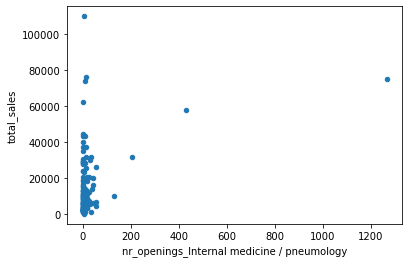

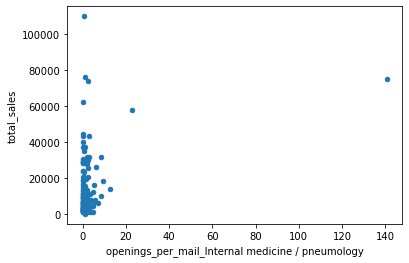

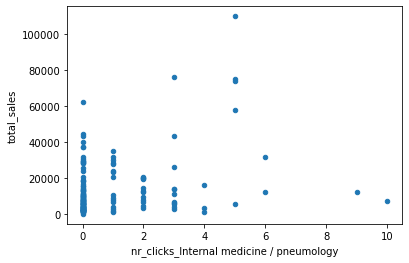

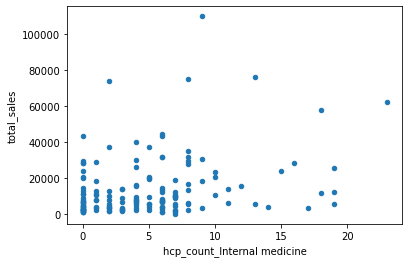

In [361]:
for c in selectedFeatures['column'].values: 
    allSpecialties.plot.scatter(x=c, y='total_sales')

### Analyse activity with regards to total sales

In [363]:
activity.head()

,hcp,specialty,region,brand,month,channel,count
0,39972,Internal medicine / pneumology,region_61,brand_1,2020-05,video,1
1,64026,General practicioner,region_168,brand_2,2020-05,phone,1
2,27892,Internal medicine,region_26,brand_2,2020-06,phone,1
3,33500,General practicioner,region_26,brand_2,2020-06,phone,1
4,61239,General practicioner,region_26,brand_2,2020-06,phone,1


In [367]:
for c in activity.columns: 
    print(c, len(set(activity[c].values.tolist())))

hcp 15819
specialty 5
region 201
brand 2
month 17
channel 4
count 7


In [441]:
brand = 'brand_2'
specialties = set(activity['specialty'].values.tolist())
channels = set(activity['channel'].values.tolist())
dataPerSpecialty = {}
for specialty in specialties: 
    if specialty in ['Internal medicine and general practicioner', 'Pediatrician']: 
        continue
    query = """
    SELECT
        sales_per_region.region, 
        total_sales, 
        activity_count, 
        unique_hcp_count, 
        nr_interactions
    FROM (
        SELECT 
            region, 
            SUM(sales) AS total_sales
        FROM salesTrain
        WHERE brand = '{brand}'
        GROUP BY region 
        ) AS sales_per_region
    LEFT OUTER JOIN (
        SELECT 
            region,
            COUNT(hcp) AS activity_count, 
            COUNT(DISTINCT hcp) AS unique_hcp_count, 
            SUM(count) AS nr_interactions
        FROM activity
        WHERE brand = '{brand}' AND specialty = '{specialty}'
        GROUP BY region
        ) AS grouped_activity
    ON grouped_activity.region = sales_per_region.region    
    """.format(brand=brand, specialty=specialty)
    df = makeQuery(query)
    dataPerSpecialty[specialty] = df
    
for key, value in dataPerSpecialty.items(): 
    print(key, value.shape)

Internal medicine / pneumology (151, 5)
General practicioner (151, 5)
Internal medicine (151, 5)


In [52]:
brand = 'brand_2'
specialties = set(activity['specialty'].values.tolist())
channels = set(activity['channel'].values.tolist())
dataPerSpecialty = {}
for specialty in specialties: 
    if specialty in ['Internal medicine and general practicioner', 'Pediatrician']: 
        continue
    query = """
    SELECT
        sales_per_region.region, 
        activity_count, 
        unique_hcp_count, 
        nr_interactions
    FROM (
        SELECT 
            region
        FROM salesTrain
        GROUP BY region 
        ) AS sales_per_region
    LEFT OUTER JOIN (
        SELECT 
            region,
            COUNT(hcp) AS activity_count, 
            COUNT(DISTINCT hcp) AS unique_hcp_count, 
            SUM(count) AS nr_interactions
        FROM activity
        WHERE brand = '{brand}' AND specialty = '{specialty}'
        GROUP BY region
        ) AS grouped_activity
    ON grouped_activity.region = sales_per_region.region    
    """.format(brand=brand, specialty=specialty)
    df = makeQuery(query)
    dataPerSpecialty[specialty] = df
    
for key, value in dataPerSpecialty.items(): 
    print(key, value.shape)

Internal medicine (201, 4)
Internal medicine / pneumology (201, 4)
General practicioner (201, 4)


In [442]:
dataPerSpecialty['Internal medicine']

,region,total_sales,activity_count,unique_hcp_count,nr_interactions
0,region_0,7819.61,10.0,9.0,10.0
1,region_1,6420.78,56.0,19.0,66.0
2,region_10,2322.08,10.0,8.0,10.0
3,region_100,18602.24,45.0,22.0,49.0
4,region_101,3392.30,19.0,13.0,20.0
...,...,...,...,...,...
146,region_95,28695.17,67.0,38.0,71.0
147,region_96,31610.37,84.0,30.0,87.0
148,region_97,4158.78,42.0,25.0,44.0
149,region_98,10025.02,20.0,14.0,25.0


In [425]:
allData = {}
columnsOfInterest = ['activity_count', 'unique_hcp_count', 'nr_interactions']
for specialty, data in dataPerSpecialty.items(): 
    # complete data
    for channel in channels: 
        rowsToAdd = []
        for i in range(151): 
            region = 'region_{}'.format(i)
            currentRegion = data[data['region'] == region]
            missingChannels = channels - set(currentRegion.channel.values.tolist())
            for channel in missingChannels: 
                rowsToAdd.append([region, channel, currentRegion.at[currentRegion[currentRegion['region'] == region].index.values[0], 'total_sales'], 0, 0, 0])
    data = pd.concat([data, pd.DataFrame(rowsToAdd, columns=data.columns)], axis=0)
    
    # reshape data
    regionData = data.groupby('region').agg({'total_sales': 'first'})
    regionData.reset_index(drop=False, inplace=True)
    newColumns = []
    newColumnNames = []
    for channel in channels: 
        if 'total_sales' in data.columns: 
            data.drop('total_sales', axis=1, inplace=True)
        values = {c: [] for c in columnsOfInterest}
        for i in range(151): 
            region = 'region_{}'.format(i)
            currentRegions = data[data['region'] == region]
            for c in columnsOfInterest: 
                values[c].append(currentRegions[currentRegions['channel'] == channel][c].values[0])
        for c, v in values.items(): 
            newColumns.append(v)
            newColumnNames.append('{}_{}'.format(channel, c))
        
    temp = pd.DataFrame(newColumns).T
    temp.rename(columns={i: newColumnNames[i] for i in range(temp.shape[1])}, inplace=True)
    allData[specialty] = pd.concat([regionData, temp], axis=1)

In [426]:
allData[specialty]

,region,total_sales,other_activity_count,other_unique_hcp_count,other_nr_interactions,video_activity_count,video_unique_hcp_count,video_nr_interactions,f2f_activity_count,f2f_unique_hcp_count,f2f_nr_interactions,phone_activity_count,phone_unique_hcp_count,phone_nr_interactions
0,region_0,41909.60,0.0,0.0,0.0,0.0,0.0,0.0,13.0,11.0,13.0,1.0,1.0,1.0
1,region_1,21658.75,24.0,18.0,27.0,0.0,0.0,0.0,51.0,24.0,51.0,59.0,28.0,78.0
2,region_10,27100.21,1.0,1.0,1.0,0.0,0.0,0.0,16.0,14.0,16.0,3.0,3.0,3.0
3,region_100,57731.61,0.0,0.0,0.0,1.0,1.0,1.0,15.0,10.0,15.0,5.0,2.0,5.0
4,region_101,6616.10,0.0,0.0,0.0,0.0,0.0,0.0,21.0,17.0,21.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,region_95,56606.24,1.0,1.0,1.0,0.0,0.0,0.0,21.0,18.0,23.0,2.0,1.0,2.0
147,region_96,76291.87,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,1.0,1.0,1.0
148,region_97,33426.97,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,9.0,2.0,2.0,2.0
149,region_98,20863.02,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,9.0,0.0,0.0,0.0


In [53]:
allSpecialties = []
# for specialty, data in allData.items(): 
for specialty, data in dataPerSpecialty.items(): 
    #if specialty != 'Internal medicine': 
    #    data.drop('total_sales', axis=1, inplace=True)
    data.fillna(0, inplace=True)
    data.set_index('region', drop=True, inplace=True)
    data.rename(columns={c: '{}_{}'.format(c, specialty) for c in data.columns if c not in ['region', 'total_sales']}, inplace=True)
    allSpecialties.append(data)
    
allSpecialties = pd.concat(allSpecialties, axis=1)
allSpecialties.shape

(201, 9)

In [444]:
allSpecialties.head()

,activity_count_Internal medicine / pneumology,unique_hcp_count_Internal medicine / pneumology,nr_interactions_Internal medicine / pneumology,activity_count_General practicioner,unique_hcp_count_General practicioner,nr_interactions_General practicioner,total_sales,activity_count_Internal medicine,unique_hcp_count_Internal medicine,nr_interactions_Internal medicine
region,,,,,,,,,,
region_0,45.0,13.0,65.0,23.0,20.0,23.0,7819.61,10.0,9.0,10.0
region_1,61.0,7.0,73.0,157.0,66.0,163.0,6420.78,56.0,19.0,66.0
region_10,3.0,1.0,5.0,23.0,19.0,23.0,2322.08,10.0,8.0,10.0
region_100,30.0,5.0,43.0,145.0,77.0,151.0,18602.24,45.0,22.0,49.0
region_101,2.0,1.0,2.0,38.0,28.0,38.0,3392.30,19.0,13.0,20.0


In [54]:
viableFeatures = [ 
    # brand 1
    #'unique_hcp_count_Internal medicine / pneumology',
    #'activity_count_Internal medicine / pneumology',
    #'nr_interactions_Internal medicine / pneumology',
    #'unique_hcp_count_Internal medicine',
    #'activity_count_Internal medicine',
    #'nr_interactions_Internal medicine',
    
    # brand 2
    'activity_count_Internal medicine / pneumology',
    'unique_hcp_count_Internal medicine / pneumology',
    'activity_count_Internal medicine',
    'nr_interactions_Internal medicine',
    'nr_interactions_Internal medicine / pneumology',
    'nr_interactions_General practicioner',
    'activity_count_General practicioner',
    'unique_hcp_count_General practicioner',
    'unique_hcp_count_Internal medicine',
]
allSpecialties[viableFeatures].to_csv('./data/data_files/region_features/activity_features_{}.csv'.format(brand))

In [429]:
correlations = []
for c in allSpecialties.columns: 
    if c in ['region', 'total_sales']: 
        continue
    corr = round(pearsonr(allSpecialties[c].values, allSpecialties['total_sales'].values)[0], 3)
    correlations.append((c, corr))
    
correlations = pd.DataFrame(correlations, columns=['column', 'correlation'])
correlations.sort_values('correlation', ascending=False, inplace=True)
correlationFiltered = correlations[correlations['correlation'].abs() > 0.10]
correlationFiltered


,column,correlation
27,video_activity_count_Internal medicine,-0.104
28,video_unique_hcp_count_Internal medicine,-0.104
9,phone_activity_count_Internal medicine / pneum...,-0.107
11,phone_nr_interactions_Internal medicine / pneu...,-0.109
29,video_nr_interactions_Internal medicine,-0.122
7,f2f_unique_hcp_count_Internal medicine / pneum...,-0.151
6,f2f_activity_count_Internal medicine / pneumology,-0.151
8,f2f_nr_interactions_Internal medicine / pneumo...,-0.166


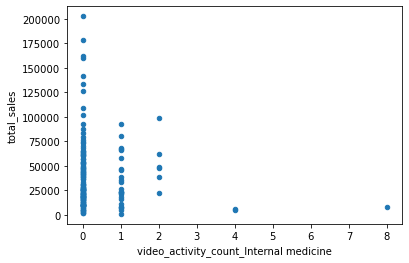

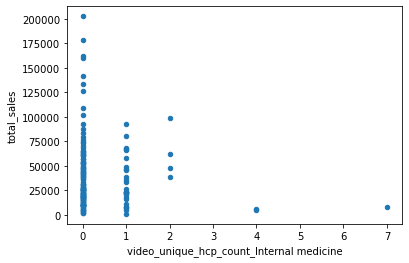

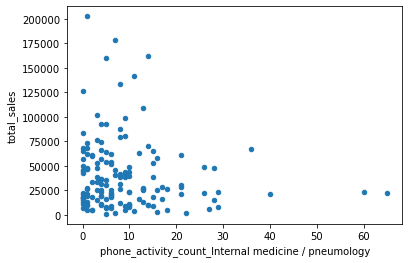

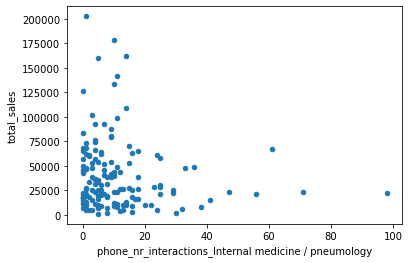

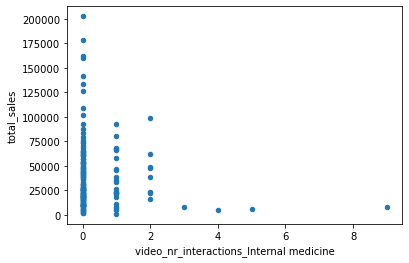

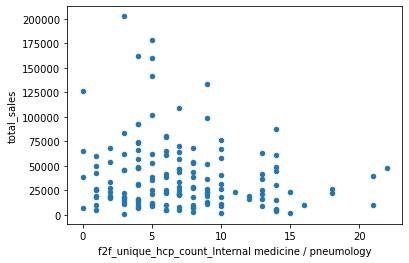

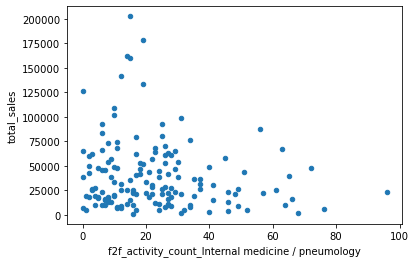

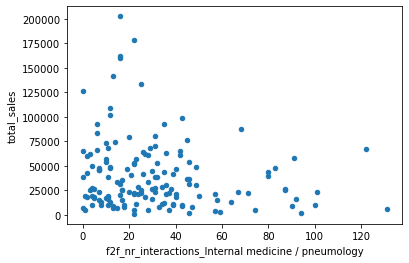

In [430]:
for c in correlationFiltered['column'].values: 
    allSpecialties.plot.scatter(x=c, y='total_sales')

### Make region dataset

In [55]:
regions = pd.read_csv('./data/data_files/regions.csv')
regionHcps = pd.read_csv('./data/data_files/regions_hcps.csv')
regions.set_index('region', inplace=True, drop=True)
regionHcps.set_index('region', inplace=True, drop=True)

brands = ['brand_1', 'brand_2']
brandData = {}
for brand in brands: 
    datasets = [regions, regionHcps]
    if os.path.isfile('./data/data_files/region_features/activity_features_{}.csv'.format(brand)): 
        df = pd.read_csv('./data/data_files/region_features/activity_features_{}.csv'.format(brand), 
                                   index_col=0)
        # df.set_index('region', inplace=True, drop=True)
        datasets.append(df)
        
    if os.path.isfile('./data/data_files/region_features/rte_features_{}.csv'.format(brand)): 
        df = pd.read_csv('./data/data_files/region_features/rte_features_{}.csv'.format(brand), 
                                   index_col=0)
        # df.set_index('region', inplace=True, drop=True)
        datasets.append(df)
        
    df = pd.concat(datasets, axis=1)
    print(brand, df.shape)
    brandData[brand] = df.loc[:, ~df.columns.duplicated()]
    

brand_1 (201, 28)
brand_2 (201, 21)


In [57]:
brandData['brand_2'].tail()

,population,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician,activity_count_Internal medicine / pneumology,unique_hcp_count_Internal medicine / pneumology,activity_count_Internal medicine,nr_interactions_Internal medicine,nr_interactions_Internal medicine / pneumology,nr_interactions_General practicioner,activity_count_General practicioner,unique_hcp_count_General practicioner,unique_hcp_count_Internal medicine
region,,,,,,,,,,,,,,,,,,
region_196,488935,4383.308467,47628.428064,50590.455429,204,5,326,3,52,24.0,5.0,59.0,61.0,30.0,153.0,129.0,56.0,34.0
region_197,367538,6688.080642,41370.782569,44005.413325,212,8,279,0,34,9.0,4.0,3.0,3.0,12.0,12.0,11.0,8.0,2.0
region_198,374756,6500.068131,43452.297389,45337.580895,182,8,228,12,25,25.0,6.0,29.0,29.0,29.0,112.0,111.0,49.0,13.0
region_199,319660,2309.103167,40976.821501,42691.767247,124,5,170,2,30,36.0,5.0,16.0,16.0,41.0,28.0,27.0,18.0,10.0
region_200,395114,2598.725436,44282.292557,46215.140591,269,4,239,25,57,16.0,3.0,50.0,55.0,18.0,238.0,201.0,105.0,30.0


In [58]:
for brand in brands: 
    df = brandData[brand]
    train = df.loc[['region_{}'.format(i) for i in range(151)], :]
    test = df.loc[['region_{}'.format(i) for i in range(151, 201)], :]
    print(train.shape, test.shape)
    train.to_csv('./data/data_files/region_features/training_{}.csv'.format(brand))
    test.to_csv('./data/data_files/region_features/test_{}.csv'.format(brand))

(151, 25) (50, 25)
(151, 18) (50, 18)
